
# EMATM0048: Software Development Programming and Algorithms (SDPA)
# `Tutorial 9 - Web Scraping`


This section briefly summarizes the most important calls with requests. For details see the documentation (http://docs.python-requests.org/en/latest/).

### Installation
In the following you find an install procedure working within the notebook (respectively after restart). Usefull links for installing modules and managing packages can be found here:

- Python Setup Tools (https://pypi.python.org/pypi/setuptools) : Software managers are easy_install or pip
- Installing Python Modules (https://docs.python.org/3.8/install/index.html) : Standard command after downloading the source python setup.py install



# Part A: APIs
In this tutorial, we will take a look at a way to gather data using API scraping. Most websites offer an API (or Application Programming Interface) as a service which provides a high level interface to directly retrieve data from their repositories or databases at the backend.

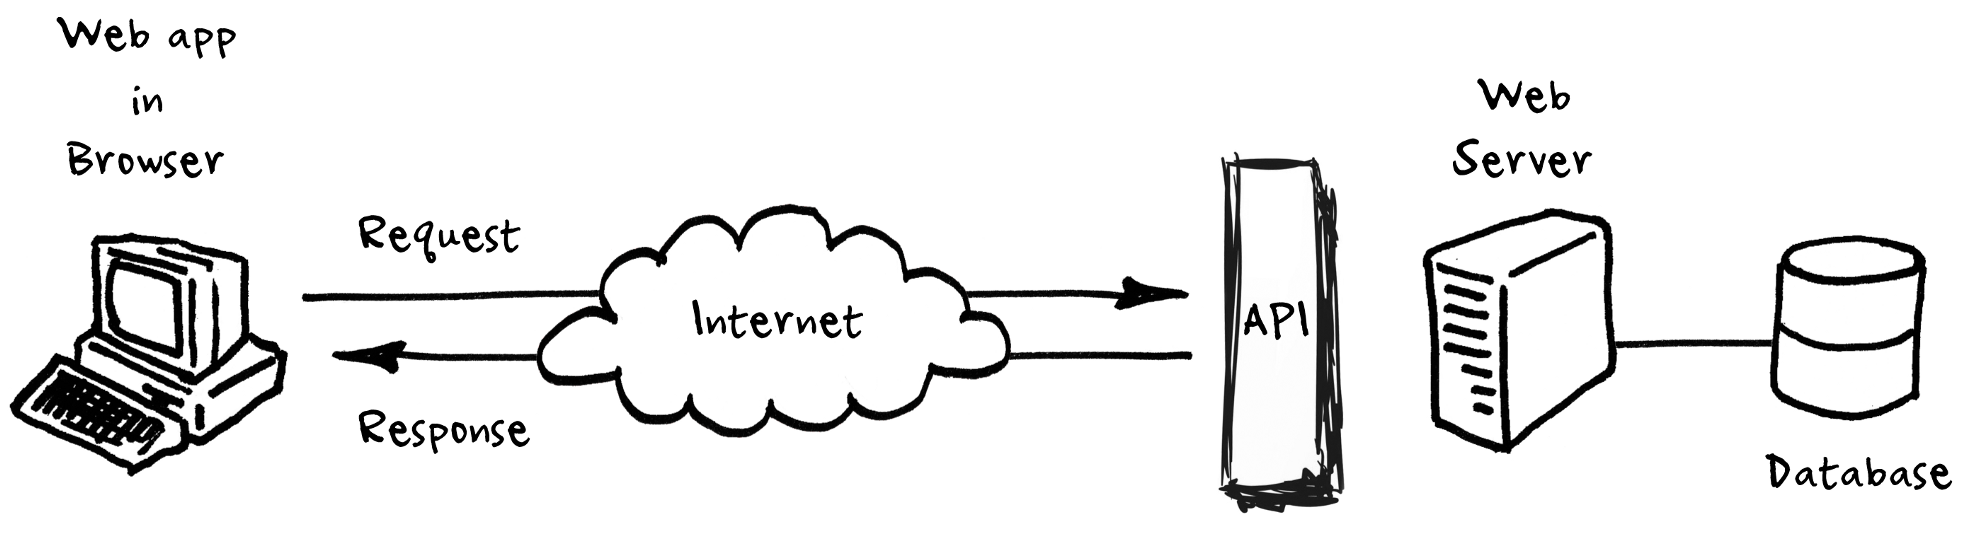

source: https://monashdatafluency.github.io/python-web-scraping/section-3-API-based-scraping/

In this tutorial we will learn about: 
* How to call APIs
* Example I: Wikipedia API
* Example II: Reddit API
* Example III: Foursquare API

## Example I: Wikipedia API

Let's say we want to gather some additional data about the university of bristol and since wikipedia is a rich source for data.  For e.g. consider the wikipedia article for university of Bristol (https://en.wikipedia.org/wiki/University_of_Bristol). 
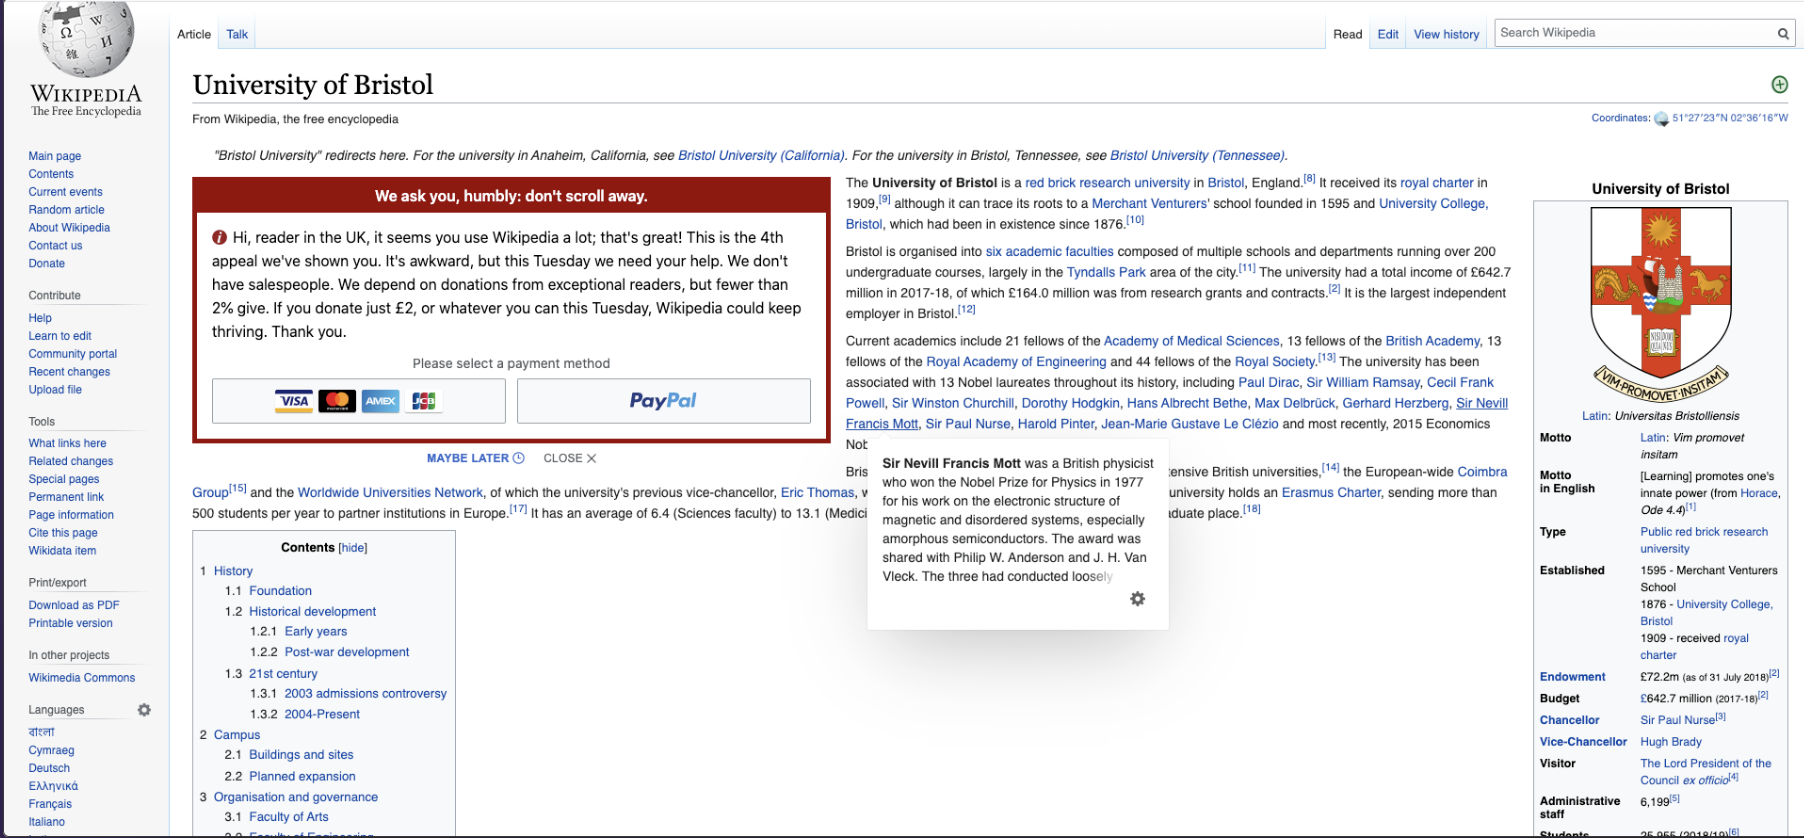
Let's begin by installing some of libraries we will use for this excercise as follows

In [1]:
# sudo apt install libcurl4-openssl-dev libssl-dev
!pip install wikipedia
!pip install wordcloud
!pip install requests

In [2]:
import json
import wikipedia
import pandas as pd

wikipedia provides easy to use methods to directly call the wiki API on our behalf and get us all the wikipedia data. Let's try retrieving data for the university of Bristol as follows,

In [3]:
print(wikipedia.search("University of Bristol"))

['University of Bristol', 'University of the West of England', 'Bristol', 'University College, Bristol', 'Bristol stool scale', 'List of University of Bristol people', "University of Bristol Students' Union", 'Diamond battery', 'Academic dress of the University of Bristol', 'Bristol Old Vic Theatre School']


As you see in the output, the searched title along with the related search suggestions are displayed. There are some of the ways where you can filter the search results by using search parameters such as results and suggestion (I know don’t worry about the spelling). The result returns the maximum number of results and the suggestion if True, return results and suggestion (if any) in a tuple.

In [4]:
print(wikipedia.search("University of Bristol", results=5, suggestion=True))

(['University of Bristol', 'University of the West of England', 'Bristol', 'University College, Bristol', 'Bristol stool scale'], None)


## Extracting Wikipedia Article Summary
We can extract the summary of a Wikipedia article using the summary() method. The article for which the summary needs to be extracted is passed as a parameter to this method.

Let's extract the summary for "University of Bristol":

In [5]:
print(wikipedia.summary("University of Bristol"))

The University of Bristol is a red brick Russell Group research university in Bristol, England. It received its royal charter in 1909, although it can trace its roots to a Merchant Venturers' school founded in 1595 and University College, Bristol, which had been in existence since 1876.Bristol is organised into six academic faculties composed of multiple schools and departments running over 200 undergraduate courses, largely in the Tyndalls Park area of the city. The university had a total income of £833.1 million in 2021–22, of which £186.4 million was from research grants and contracts. It is the largest independent employer in Bristol. Current academics include 23 fellows of the Academy of Medical Sciences, 13 fellows of the British Academy, 43 fellows of the Academy of Social Sciences, 13 fellows of the Royal Academy of Engineering and 48 fellows of the Royal Society. The University of Bristol's alumni and faculty include 13 Nobel laureates.Bristol is a member of the Russell Group 

## Page Access
The API also gives us full access to the Wikipedia page, with the help of which we can access the title, URL, content, images, links of the complete page. In order to access the page you need to load the page first as shown below:
Just a heads up, I will use a single article topic  as a reference in this example:

In [6]:
UoB = wikipedia.page("University of Bristol")
print(UoB.title)

University of Bristol


In [7]:
print(UoB.content)


The University of Bristol is a red brick Russell Group research university in Bristol, England. It received its royal charter in 1909, although it can trace its roots to a Merchant Venturers' school founded in 1595 and University College, Bristol, which had been in existence since 1876.Bristol is organised into six academic faculties composed of multiple schools and departments running over 200 undergraduate courses, largely in the Tyndalls Park area of the city. The university had a total income of £833.1 million in 2021–22, of which £186.4 million was from research grants and contracts. It is the largest independent employer in Bristol. Current academics include 23 fellows of the Academy of Medical Sciences, 13 fellows of the British Academy, 43 fellows of the Academy of Social Sciences, 13 fellows of the Royal Academy of Engineering and 48 fellows of the Royal Society. The University of Bristol's alumni and faculty include 13 Nobel laureates.Bristol is a member of the Russell Group 

In [8]:
print(UoB.images)


['https://upload.wikimedia.org/wikipedia/commons/6/63/070327_ukbris_ubu01.jpg', 'https://upload.wikimedia.org/wikipedia/commons/8/83/070522_ukbris_waverley.jpg', 'https://upload.wikimedia.org/wikipedia/commons/d/d7/Alastair_Stewart_31.08.07.jpg', 'https://upload.wikimedia.org/wikipedia/commons/d/d6/Bristol_10_Years.png', 'https://upload.wikimedia.org/wikipedia/commons/f/fa/Bristol_University_Chemistry_Department.jpg', 'https://upload.wikimedia.org/wikipedia/commons/1/10/Bristol_University_Wills_Memorial_Building.jpg', 'https://upload.wikimedia.org/wikipedia/commons/0/03/Bristol_University_from_Cabot_Tower.jpg', 'https://upload.wikimedia.org/wikipedia/commons/c/c8/CliftonHillHouse.JPG', 'https://upload.wikimedia.org/wikipedia/commons/a/a7/David_Walliams.JPG', 'https://upload.wikimedia.org/wikipedia/commons/c/ce/Derren_Victor_Brown.jpg', 'https://upload.wikimedia.org/wikipedia/commons/5/50/Paul_Dirac%2C_1933.jpg', 'https://upload.wikimedia.org/wikipedia/commons/6/6d/Geography_Department%

In [9]:
print(UoB.links)


['2010 United Kingdom student protests', '93% Club', 'AECC University College', 'Aarhus University', 'Abertay University', 'Aberystwyth University', 'Academic Ranking of World Universities', 'Academic degree', 'Academic dress', 'Academic dress of the University of Bristol', 'Academic publishing', 'Academy of Medical Sciences', 'Adam Tickell', 'Aerospace engineering', 'Alastair Stewart', 'Albert II, Prince of Monaco', 'Alex Cox', 'Alexander Bird', 'Alexandru Ioan Cuza University', 'Alfred Marshall', 'All-Party Parliamentary Group against Antisemitism', 'Ancient university', 'Andalusia Academy', 'Anderson Report (British Education)', 'Andre Geim', 'Andrew Booker (mathematician)', 'Angela Carter', 'Anglia Ruskin University', 'Anime', 'Anne McClain', 'Anthony Epstein', 'Arden University', 'Arizona State University', 'Armorial of UK universities', 'Arts University Bournemouth', 'Arts University Plymouth', 'Ashton Park School', 'Aston University', 'Astrakhan State University', "Aurora St Chr

-------------

## Example II:  Reddit API

### Step 1: Send a specific request. The server will return information in a structured format

In [1]:
import requests
 
subreddit = 'python'
limit = 100
timeframe = 'year' #hour, day, week, month, year, all
listing = 'top' # controversial, best, hot, new, random, rising, top
 
def get_reddit(subreddit, listing, limit, timeframe):
    try:
        base_url = f'https://www.reddit.com/r/{subreddit}/{listing}.json?limit={limit}&t={timeframe}'
        request = requests.get(base_url, headers = {'User-agent': 'SDPA-2023'})
    except:
        print('An Error Occured')
    return request
 
r = get_reddit(subreddit,listing,limit,timeframe)
print(r)

<Response [200]>


### Step 2: Parsing JSON In Python

In [11]:
import json
data = json.loads(r.content)
data

{'kind': 'Listing',
 'data': {'after': 't3_ztqgnt',
  'dist': 100,
  'modhash': '',
  'geo_filter': '',
  'children': [{'kind': 't3',
    'data': {'approved_at_utc': None,
     'subreddit': 'Python',
     'selftext': '\n\n"I didn\'t have time to write a short letter, so I wrote a long one instead."\n\nThis is a long one, so I\'m putting the TLDR up top:\n\n# TLDR\nA blackout has been proposed for June 12-14 to protest the API changes and extreme cost. \n\nThe r/Python community seems very vocal about joining the blackout and I would like the r/Python community\'s input on this. Would you like to participate? How would you like to participate? \n\nIf we do join the blackout, there are two different ways to participate which we need:\n- Setting the subreddit to private (no engagement at all--including no ability to explain why our sub is private)\n- Turning off submissions (the community and posts are still viewable, but no new comments or posts)\n\nPlease offer your feedback here, this 

### Step 3: Extract title

In [12]:
import numpy as np

temp = []
for i in range(limit):
    temp.append(data['data']['children'][i]['data']['title'])
title = np.array(temp)
title

array(['Should r/Python participate in the June 12th Blackout protesting the API changes',
       'The Python Mega Course is now free on Udemy',
       'Going dark on 12th June',
       'at 44, I am struggling on Python for two months now but I keep at it. 2 hours a night, after the kids sleep, I work on it and will eventually be able to use it to get a better job, a better life for them.',
       'You should know these f-string tricks',
       'Spent Months Writing A Web Dev Course For A Platform, But It Got Canceled Midway. Publishing It Free For The Community.',
       'Detailed Python developer roadmap',
       'We are the developers behind pandas, currently preparing for the 2.0 release :) AMA',
       "I'm banned for life from advertising on Meta. Because I teach Python",
       'TechCrunch | Python 4 To Be Renamed to Viper And Introduce TypeScript support',
       'I’m developing a programming game where you use Python to automate all kinds of machines, robots, drones and more a

In [13]:
# try pd.json_normalize(data['data']['children'])

--------------------

## Example 3 (advanced): 

In this part, you will learn in details how to make calls to the Foursquare API for different purposes. You will learn how to construct a URL to send a request to the API to search for a specific type of venues, to explore a particular venue, to explore a Foursquare user, to explore a geographical location, and to get trending venues around a location. Also, you will learn how to use the visualization library, Folium, to visualize the results.
### Import necessary library: 

In [19]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# !conda install -c conda-forge geopy --yes 
!pip -q install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library in old pandas version
# from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
!pip -q install folium
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


### Define Foursquare Credentials and Version (V3)
Make sure that you have created a Foursquare developer account on https://foursquare.com/developers/. and have your credentials handy. In addition to Credentials, we will need to specify the search questy, radius and other paratemers 

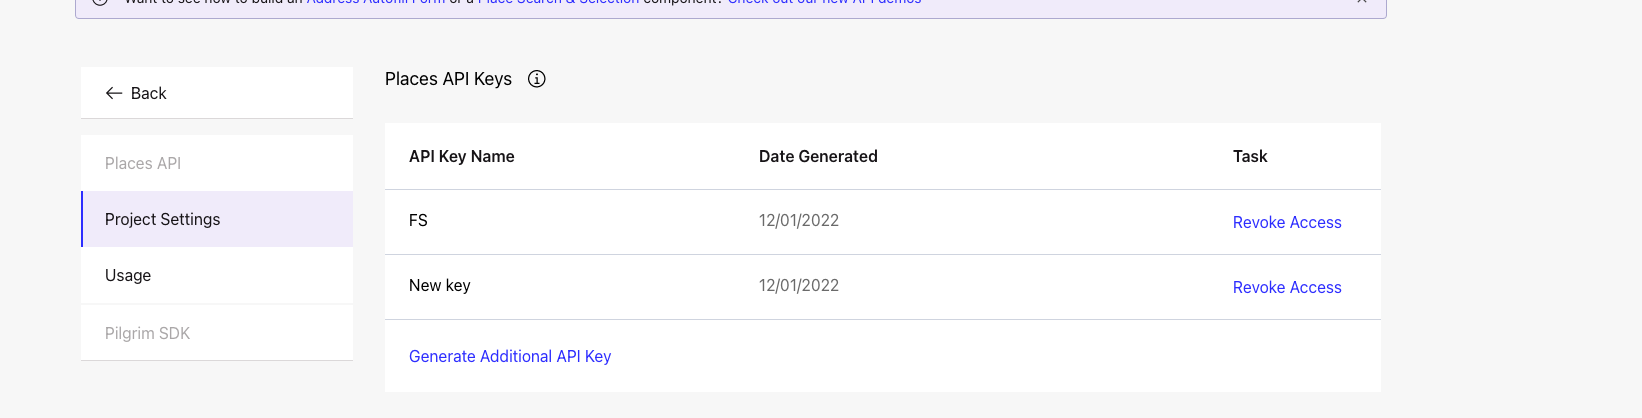

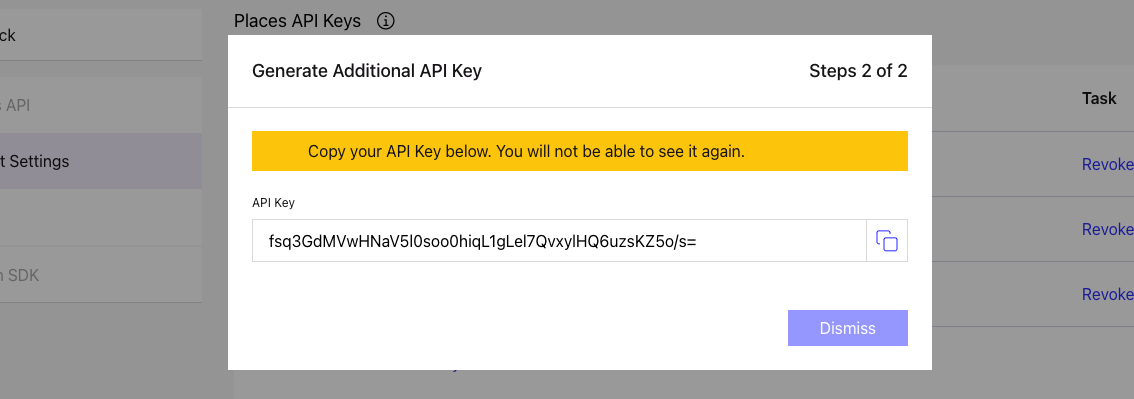

In [20]:
import requests

url = "https://api.foursquare.com/v3/places/search"

#What parameters, in this example, coffee shops near Bristol that is open now, sorted by distance. 
#check the list of parameters here https://location.foursquare.com/developer/reference/place-search
params = {
  	"query": "coffee",
  	"near": "Bristol,UK",
  	"open_now": "true",
  	"sort":"DISTANCE",
}

headers = {
    "Accept": "application/json",
    #your API key in the above screenshot
    "Authorization": "fsq3AT4h2SjhPIGBYfMa8fk9g6Mj7oqpUs8Cwur/pq4VyKc="
}

#Display the response
response = requests.request("GET", url, params=params, headers=headers)
print(response.text)

{"results":[{"fsq_id":"55031869498e5fd35f96c419","categories":[{"id":13003,"name":"Bar","short_name":"Bar","plural_name":"Bars","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/nightlife/pub_","suffix":".png"}},{"id":13034,"name":"Café","short_name":"Café","plural_name":"Cafés","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/food/cafe_","suffix":".png"}},{"id":13065,"name":"Restaurant","short_name":"Restaurant","plural_name":"Restaurants","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/food/default_","suffix":".png"}}],"chains":[],"closed_bucket":"VeryLikelyOpen","distance":1161,"geocodes":{"main":{"latitude":51.456631,"longitude":-2.613135},"roof":{"latitude":51.456631,"longitude":-2.613135}},"link":"/v3/places/55031869498e5fd35f96c419","location":{"address":"Richmond Building, 105 Queens Rd","admin_region":"England","country":"GB","cross_street":"","formatted_address":"Richmond Building, 105 Queens Rd, Bristol, BS8 1LN","locality":"Bristol","post_town":"Bris

In [21]:
results = response.json()["results"]

## Get relevant part of JSON and transform it into a pandas dataframe¶


In [22]:
dataframe = pd.json_normalize(results)
dataframe.head()

fsq_id  \
0  55031869498e5fd35f96c419   
1  4c65b9cbb80abe9a171acbe5   
2  5dba8f0fe3233200075e262a   

                                          categories chains   closed_bucket  \
0  [{'id': 13003, 'name': 'Bar', 'short_name': 'B...     []  VeryLikelyOpen   
1  [{'id': 13003, 'name': 'Bar', 'short_name': 'B...     []  VeryLikelyOpen   
2  [{'id': 13034, 'name': 'Café', 'short_name': '...     []  VeryLikelyOpen   

   distance                                 link                    name  \
0      1161  /v3/places/55031869498e5fd35f96c419  The Balloon Café & Bar   
1      1814  /v3/places/4c65b9cbb80abe9a171acbe5         The Blue Lagoon   
2      4789  /v3/places/5dba8f0fe3233200075e262a          Wild Bean Café   

        timezone  geocodes.main.latitude  geocodes.main.longitude  ...  \
0  Europe/London               51.456631                -2.613135  ...   
1  Europe/London               51.471408                -2.593017  ...   
2  Europe/London               51.495583                -2.620644  ...   

   location.country  location.cross_street  \
0                GB                          
1                GB                          
2                GB                          

                          location.formatted_address location.locality  \
0  Richmond Building, 105 Queens Rd, Bristol, BS8...           Bristol   
1                 20 Gloucester Rd, Bristol, BS7 8AE           Bristol   
2                    Falcondale Rd, Bristol, BS9 3JL           Bristol   

  location.post_town location.postcode location.region  \
0            Bristol           BS8 1LN         Bristol   
1            Bristol           BS7 8AE         Bristol   
2            Bristol           BS9 3JL         Bristol   

  related_places.parent.fsq_id  \
0                          NaN   
1                          NaN   
2     58723db745c3ed3a19ff8faf   

                    related_places.parent.categories  \
0                                                NaN   
1                                                NaN   
2  [{'id': 19007, 'name': 'Fuel Station', 'short_...   

  related_places.parent.name  
0                        NaN  
1                        NaN  
2                         Bp  

[3 rows x 24 columns]

## Plot data on Map


### Let's visualize the cafe that are near bristol


In [32]:
#Getting lat and long for any location, pass the name, postcode and get log, lat
address = 'University of Bristol'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)
# 51.4905582 -2.6304824978595356

51.4905582 -2.6304824978595356


### If you encounter the "Max retries exceeded......Caused by SSLError......" error for the cell above, you can get lat and long from address using https://nominatim.openstreetmap.org/ui/search.html, then set latitude, longitude manually. You can also refer to https://stackoverflow.com/questions/51925384/unable-to-get-local-issuer-certificate-when-using-requests

In [33]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# folium.features.CircleMarker
# add a red circle marker to represent the university of Bristol
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the cafe  as blue circle markers
for lat, lng, label in zip(dataframe['geocodes.main.latitude'], dataframe['geocodes.main.longitude'], dataframe.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### <font color= 'blue'> Question: </font>: Explore and visualise on map trending venues in your area

# Part B: HTML based scraping



In this part we will look at a few HTML fundamentals to understand how web scraping works and scrape a website for structured data. 

We will cover the following: 
- HTTP Requests to crawl HTML page
- Reading HTML table with Pandas
- Parsing HTML page with BeautifulSoup

## 1. HTTP Requests in Python: The requests Package

Instead of the browser requesting for the content of the webpage, Python can be used for the same. A HTTP request to the web server can be sent with the requests library and the response can be examined. Typically every request receives a response with response headers and status code details.
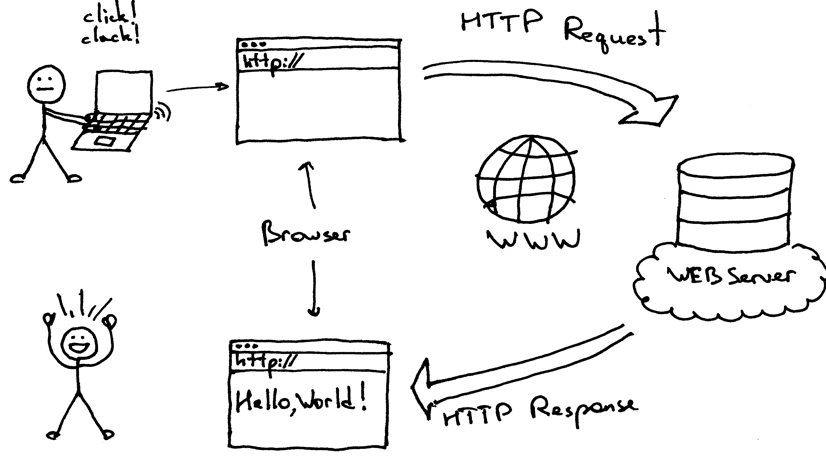
image source: https://monashdatafluency.github.io/pytho

Let us request for the web content for this web site https://api.github.com/events The requests library can be used to work with webpages and web content. A request is made to get the content of the webpage with the get() method. The requests module provides an easy and handy API to send http requests over the network.


In [34]:
!pip install requests

### Usage
A brief example (based on the requests documentation http://docs.python-requests.org/en/latest/user/quickstart/):

In [9]:
import requests
import json
r = requests.get('https://api.github.com/events')
print ("Status of request (200=success): %d"%r.status_code)

Status of request (200=success): 200


### The request object
The request is the main source of invoking http requst. For every request method (the verbs), a separate function exist.

A response is received from the web server. This response will have response headers and status codes associated to that particular request. Response headers give the detailed information about the request made to the web server.


In [4]:
r.headers

{'Server': 'GitHub.com', 'Date': 'Fri, 17 Nov 2023 17:28:39 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Cache-Control': 'public, max-age=60, s-maxage=60', 'Vary': 'Accept, Accept-Encoding, Accept, X-Requested-With', 'ETag': 'W/"499a3ee895696a8d4bdaafd9b89bde343f8354d14d4b51fc2c0b820f0969211a"', 'Last-Modified': 'Fri, 17 Nov 2023 17:23:38 GMT', 'X-Poll-Interval': '60', 'X-GitHub-Media-Type': 'github.v3; format=json', 'Link': '<https://api.github.com/events?page=2>; rel="next", <https://api.github.com/events?page=10>; rel="last"', 'x-github-api-version-selected': '2022-11-28', 'Access-Control-Expose-Headers': 'ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Used, X-RateLimit-Resource, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type, X-GitHub-SSO, X-GitHub-Request-Id, Deprecation, Sunset', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000; 

In [5]:
print ("HTTP Headers %s"%str(r.headers['content-type']))

HTTP Headers application/json; charset=utf-8


Every response will have a status code. The status codes indicate whether a specific HTTP request has been successfully completed. Responses are grouped in five classes:

- Informational responses (100–199)
- Successful responses (200–299)
- Redirects (300–399)
- Client errors (400–499)
- Server errors (500–599)
Let us check the response status code for the HTTP request we placed



In [6]:
print ("Status of request (200=success): %d"%r.status_code)

Status of request (200=success): 200


Response automatically decode content from the server by guessing/estimating the encoding. The content can be accessed under the 'text' field. After changing the encoding through setting 'encoding' subsquent access to 'text' provides the new encoding.

In [7]:
r.text[1:1000]

'{"id":"33437466379","type":"PushEvent","actor":{"id":142507624,"login":"walterdmp","display_login":"walterdmp","gravatar_id":"","url":"https://api.github.com/users/walterdmp","avatar_url":"https://avatars.githubusercontent.com/u/142507624?"},"repo":{"id":720140420,"name":"walterdmp/CSharp_SistemaCadastroMercado","url":"https://api.github.com/repos/walterdmp/CSharp_SistemaCadastroMercado"},"payload":{"repository_id":720140420,"push_id":15867932937,"size":2,"distinct_size":2,"ref":"refs/heads/master","head":"6ed161da9803794141fb4ff3bffec5b7ba1cc48a","before":"01c23f43650381047e72cc42d0d4ae5182cee0ec","commits":[{"sha":"b23217c6a21c861722befd6210e17bc47231645d","author":{"email":"walter.dmp@hotmail.com","name":"Walter Dias Marques Pereira"},"message":"Atualizações de Name","distinct":true,"url":"https://api.github.com/repos/walterdmp/CSharp_SistemaCadastroMercado/commits/b23217c6a21c861722befd6210e17bc47231645d"},{"sha":"6ed161da9803794141fb4ff3bffec5b7ba1cc48a","author":{"email":"walter

### JSON Response Content
JSON is returned via requests.json

In [10]:
print (type(r.json()))
#pretty print the json using json.dumps
print (json.dumps(r.json(), indent =  4))

<class 'list'>
[
    {
        "id": "33437489626",
        "type": "PushEvent",
        "actor": {
            "id": 16675675,
            "login": "mkarmark",
            "display_login": "mkarmark",
            "gravatar_id": "",
            "url": "https://api.github.com/users/mkarmark",
            "avatar_url": "https://avatars.githubusercontent.com/u/16675675?"
        },
        "repo": {
            "id": 720149747,
            "name": "static-web-apps-testing-org/swa5556e6a057f04736a731fcbb83f25e6d",
            "url": "https://api.github.com/repos/static-web-apps-testing-org/swa5556e6a057f04736a731fcbb83f25e6d"
        },
        "payload": {
            "repository_id": 720149747,
            "push_id": 15867945472,
            "size": 1,
            "distinct_size": 1,
            "ref": "refs/heads/main",
            "head": "fe755ee974057c663d5d27a8700bfda2148a26ae",
            "before": "4728cecb3832b5015550b8e67b98c88ca171be01",
            "commits": [
              

-----------

## 2.  Reading HTML tables with Pandas
The pandas read_html() function is a quick and convenient way to turn an HTML table into a pandas DataFrame. This function can be useful for quickly incorporating tables from various websites without figuring out how to scrape the site’s HTML. However, there can be some challenges in cleaning and formatting the data before analysing it.The basic usage is of pandas read_html is pretty simple and works well on many Wikipedia pages since the tables are not complicated.

In [12]:
import pandas as pd
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Minnesota')
print(table_MN)

[                                            Minnesota  \
0                                               State   
1   .mw-parser-output .ib-settlement-cols{text-ali...   
2   Nicknames: Land of 10,000 Lakes;North Star Sta...   
3   Motto: L'Étoile du Nord (French: The Star of t...   
4                           Anthem: "Hail! Minnesota"   
5   Map of the United States with Minnesota highli...   
6                                             Country   
7                                    Before statehood   
8                               Admitted to the Union   
9                                             Capital   
10                                       Largest city   
11                       Largest county or equivalent   
12                      Largest metro and urban areas   
13                                         Government   
14                                         • Governor   
15                              • Lieutenant Governor   
16                            

In [42]:
print(f'Total tables: {len(table_MN)}')

Total tables: 29


With 31 tables, it can be challenging to find the one you need. To make the table selection easier, use the match parameter to select a subset of tables. We can use the caption “Election results from statewide races” to select the table:

In [43]:
table_MN[10]

0                1
0  Festivals       State Fair
1      Other  Mall of America

In [44]:
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Minnesota', match='United States presidential election results for Minnesota')
len(table_MN)

1

In [45]:
df = table_MN[0]
df.head()

Year Republican         Democratic         Third party       
   Year        No.       %        No.       %         No.      %
0  2020    1484065  45.28%    1717077  52.40%       76029  2.32%
1  2016    1323232  44.93%    1367825  46.44%      254176  8.63%
2  2012    1320225  44.96%    1546167  52.65%       70169  2.39%
3  2008    1275409  43.82%    1573354  54.06%       61606  2.12%
4  2004    1346695  47.61%    1445014  51.09%       36678  1.30%

Pandas makes it easy to read in the table and also handles the year column that spans multiple rows. This is an example where it is easier to use pandas than to try to scrape it all yourself.

Overall, this looks ok until we look at the data types with df.info() :

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   (Year, Year)        41 non-null     int64 
 1   (Republican, No.)   41 non-null     int64 
 2   (Republican, %)     41 non-null     object
 3   (Democratic, No.)   41 non-null     int64 
 4   (Democratic, %)     41 non-null     object
 5   (Third party, No.)  41 non-null     int64 
 6   (Third party, %)    41 non-null     object
dtypes: int64(4), object(3)
memory usage: 2.4+ KB


## Example 2: Yahoo finance

In [14]:
!pip install html5lib 

     -------------------------------------- 112.2/112.2 kB 3.3 MB/s eta 0:00:00


In [16]:
url_link = 'https://finance.yahoo.com/quote/NFLX/history?p=NFLX%27'
r = requests.get(url_link,headers ={'User-Agent':'Mozilla/5.0'})
read_html_pandas_data = pd.read_html(r.text)
print(read_html_pandas_data)

[                                                  Date  \
0                                         Nov 17, 2023   
1                                         Nov 16, 2023   
2                                         Nov 15, 2023   
3                                         Nov 14, 2023   
4                                         Nov 13, 2023   
..                                                 ...   
96                                        Jul 05, 2023   
97                                        Jul 03, 2023   
98                                        Jun 30, 2023   
99                                        Jun 29, 2023   
100  *Close price adjusted for splits.**Adjusted cl...   

                                                  Open  \
0                                               466.95   
1                                               463.00   
2                                               452.81   
3                                               448.78   
4           

To get a DataFrame from this list, you only need to make one addition:


In [49]:
df= pd.read_html(r.text)[0]

/var/folders/sg/td2g432d4_q96v_4dnz198hc0000gq/T/ipykernel_37930/2591419102.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df= pd.read_html(r.text)[0]


In [50]:
df.head()

Date    Open    High     Low  Close* Adj Close**   Volume
0  Nov 14, 2023  448.78  454.08  445.64  448.65      448.65  3854186
1  Nov 13, 2023  447.25  448.43  442.60  444.62      444.62  2896100
2  Nov 10, 2023  437.48  447.48  435.51  447.24      447.24  4440600
3  Nov 09, 2023  438.03  440.38  434.35  435.15      435.15  2735500
4  Nov 08, 2023  435.00  438.07  433.68  436.65      436.65  2356800

### Example 3: 
Let us now scrape a list of the fotune 500 companies for the year 2018. The website from which the data is to be scraped is this.https://www.zyxware.com/articles/5914/list-of-fortune-500-companies-and-their-websites-2018

In [51]:
url_link= 'https://www.zyxware.com/articles/5914/list-of-fortune-500-companies-and-their-websites-2018'
r = requests.get(url_link,headers ={'User-Agent':'Mozilla/5.0'})
data500 = pd.read_html(r.text)
print(f'Extracted {len(data500)} table/s')
data500[0]

Extracted 1 table/s


/var/folders/sg/td2g432d4_q96v_4dnz198hc0000gq/T/ipykernel_37930/2237169126.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data500 = pd.read_html(r.text)


Rank                    Company                           Website
0       1                    Walmart      http://www.stock.walmart.com
1       2                Exxon Mobil         http://www.exxonmobil.com
2       3         Berkshire Hathaway  http://www.berkshirehathaway.com
3       4                      Apple              http://www.apple.com
4       5         UnitedHealth Group  http://www.unitedhealthgroup.com
..    ...                        ...                               ...
495   496         Polaris Industries            http://www.polaris.com
496   497  Pioneer Natural Resources                http://www.pxd.com
497   498             ABM Industries                http://www.abm.com
498   499              Vistra Energy       http://www.vistraenergy.com
499   500                     Cintas             http://www.cintas.com

[500 rows x 3 columns]

### <font color= 'Blue'> Question: </font>

Extract cities in the UK from information in tables on this website
https://en.wikipedia.org/wiki/List_of_cities_in_the_United_Kingdom

## Parsing HTML page with BeautifulSoup: 
You might need to parse HTML for information that are not represented in tables. 


## Step 1: Send a request and get the page contents 

In [19]:
import requests
import pandas as pd

web_url = 'https://www.luckytailsalpacafarm.co.uk/'
response = requests.get(web_url)

print('Status code\n', response.status_code)
print('\n--\n')
print('Content of the website\n', response.content[:2000])


Status code
 200

--

Content of the website
 b'<!DOCTYPE html>\n<html lang="en">\n<head>\n  \n  <meta charset=\'utf-8\'>\n  <meta name="viewport" content="width=device-width, initial-scale=1" id="wixDesktopViewport" />\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\n  <meta name="generator" content="Wix.com Website Builder"/>\n\n  <link rel="icon" sizes="192x192" href="https://static.parastorage.com/client/pfavico.ico" type="image/x-icon"/>\n  <link rel="shortcut icon" href="https://static.parastorage.com/client/pfavico.ico" type="image/x-icon"/>\n  <link rel="apple-touch-icon" href="https://static.parastorage.com/client/pfavico.ico" type="image/x-icon"/>\n  \n  <!-- Safari Pinned Tab Icon -->\n  <!-- <link rel="mask-icon" href="https://static.parastorage.com/client/pfavico.ico"> -->\n\n  <!-- Legacy Polyfills -->\n  <script nomodule="" src="https://static.parastorage.com/unpkg/core-js-bundle@3.2.1/minified.js"></script>\n  <script nomodule="" src="https://static.parastorage

## Step 2: Parsing HTML and accessing different elements¶


bs4 is a Python library which parses through HTML content and understands the complete structure of the content. The response content can be passed to a BeautifulSoup() method to obtain a soup object which looks very structured.

In [53]:
! pip install bs4

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=46bb837d4885beb1e5d25d3931e0591658012afe42dfe09a44ec5bdade2aafa4
  Stored in directory: /Users/xg23943/Library/Caches/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [27]:
from bs4 import BeautifulSoup
soup_object = BeautifulSoup(response.text)

# Uncomment the below line and look into the contents of soup_object
print(soup_object.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" id="wixDesktopViewport" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="Wix.com Website Builder" name="generator"/>
  <link href="https://static.parastorage.com/client/pfavico.ico" rel="icon" sizes="192x192" type="image/x-icon"/>
  <link href="https://static.parastorage.com/client/pfavico.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="https://static.parastorage.com/client/pfavico.ico" rel="apple-touch-icon" type="image/x-icon"/>
  <!-- Safari Pinned Tab Icon -->
  <!-- <link rel="mask-icon" href="https://static.parastorage.com/client/pfavico.ico"> -->
  <!-- Legacy Polyfills -->
  <script nomodule="" src="https://static.parastorage.com/unpkg/core-js-bundle@3.2.1/minified.js">
  </script>
  <script nomodule="" src="https://static.parastorage.com/unpkg/focus-within-polyfill@5.0.9/dist/focus-within-polyfill.js">


### Explore the schema: Manipulating elments of HTML page


To be able to accurately extract relevant data from the webpage, it is important to explore the schema and understand the structure of the webpage. A good way to do this is to inspect the webpage directly on a web browser.

This HTML content is  transformed into a BeautifulSoup object, with the following structure:

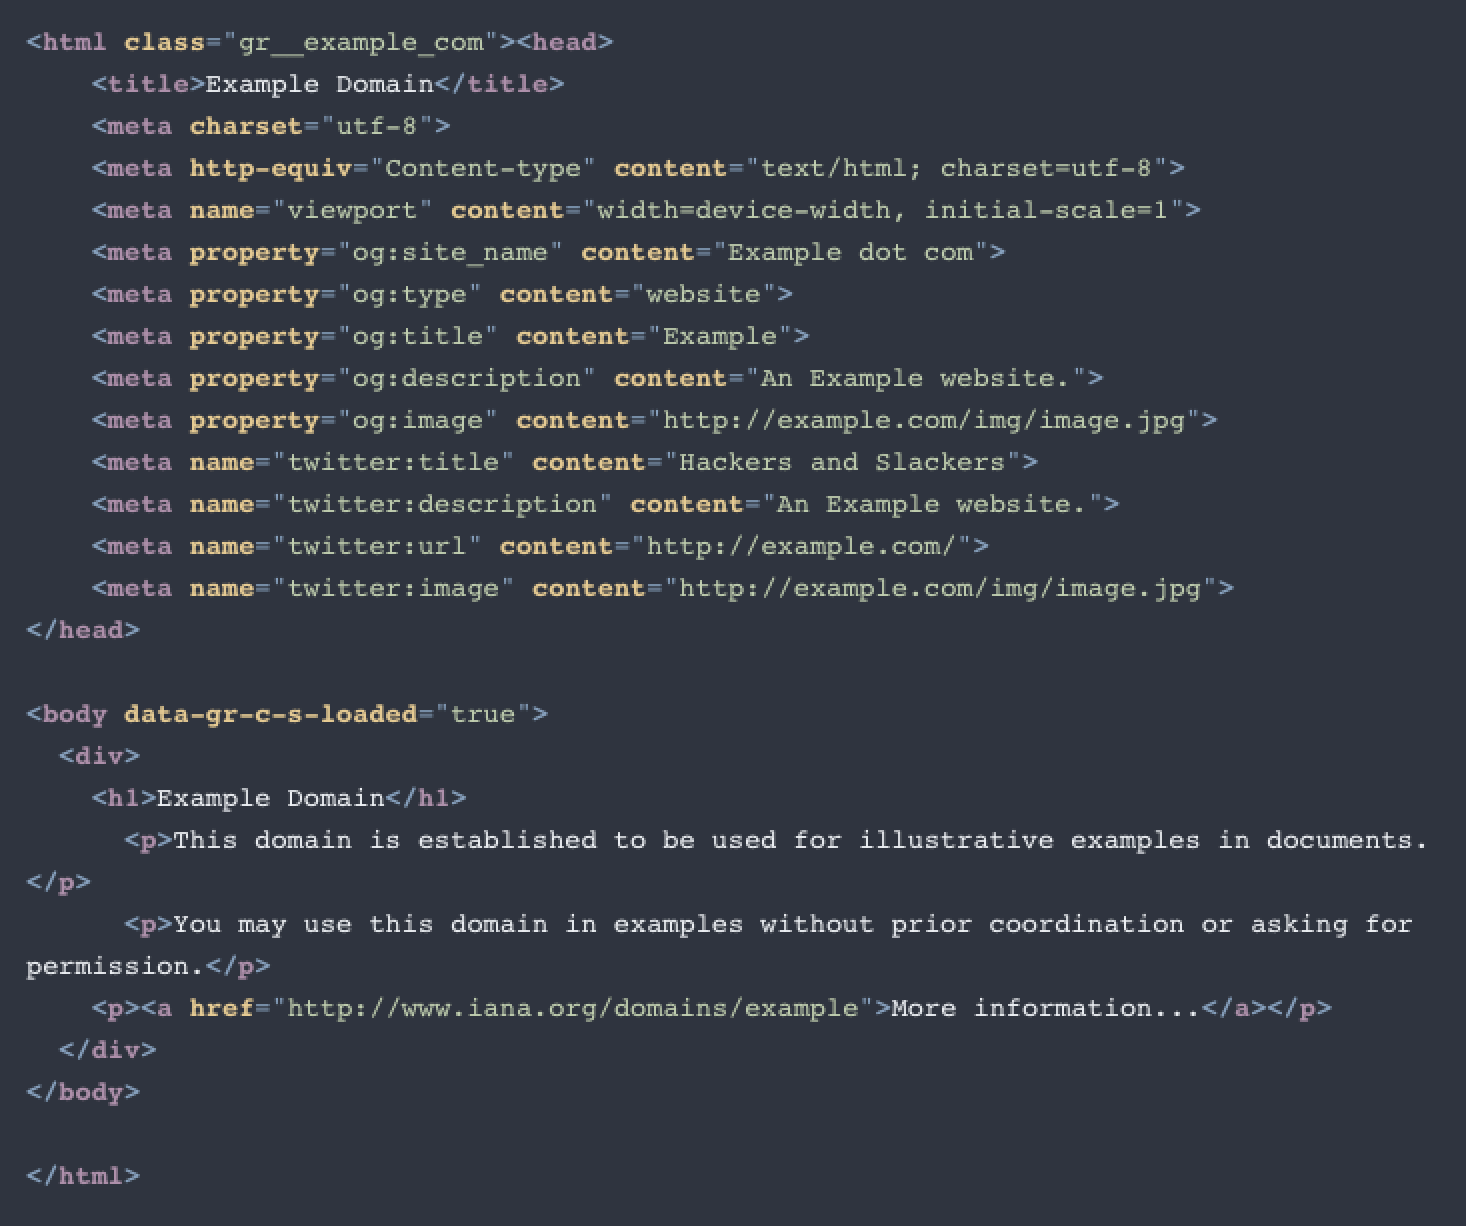

To inspect elements in th epage, open the webpage on a browser - Right click on the data content to be extracted - Click on Inspect or Inspect element option This will open a console window which shows the real time HTML code corresponding to the web content. Now identify the type of HTML tag which contains all the data along with any id names or class names associated to that HTML tag. In our case, the data is enclosed in the \<table> HTML tag with the class name 'data-table'. This information can be used to search for the web content directly in our soup object with the find_all() method. This will return a soup object.

If you are not familiar with HTML, take some time to read about HTML element tags, HTML element attributes and HTML classes. Knowing about these parts of HTML will make it much easier for us to identify and extract the data we want. Let's first what is inside the soup object as a text




In [26]:
## Uncomment this to see the contents
print(soup_object.get_text())







































































Alpaca Walking Farm Park Animal Encounters | Lucky Tails Alpacas | Atherstone





























top of pageHOMEGift VouchersChristmasAlpacasAlpaca walks & ExperiencesAdopt an alpacaMeerkatsDonkey ExperiencesCare FarmBlogFAQcafeResidential Home VisitsMoreUse tab to navigate through the menu items.0Log In15% off gift vouchers until December 1st with code  GIFT15Buy Now




20% off Christmas children walks throughout weekends in December with code  CHILDREN20Book Now




Lucky Tails Alpaca FarmBOOK NOWPLEASE NOTE WELLIES ARE ADVISED DURING WINTER MONTHS Services About UsContact UsDonkey ExperiencesCome meet our little donkeys!! On our experience you will meet and greet with our donkeys, give them a lovely groom, feed them some tasty treats, take them for a walk and then finally fill their treatballs for them to have some fun.
Our donkey experiences make the best gifts for an animal lover. BOOK NOWSERVICESSERV

There are a lot of blank lines in this output. These are the result of newline characters in the HTML document’s text. 

The most straightforward way to finding information in our soup variable is by utilizing soup.find(...) or soup.find_all(...). These two methods work the same with one exception: find returns the first HTML element found, whereas find_all returns a list of all elements matching the criteria (even if only one element is found, find_all will return a list of a single item).


- Often, you need to get only specific text from an HTML document. Using Beautiful Soup first to extract the text and then using the .find() string method is sometimes easier than working with regular expressions.

- However, sometimes the HTML tags themselves are the elements that point out the data you want to retrieve. For instance, perhaps you want to retrieve the URLs for all the images on the page. These links are contained in the src attribute of \<img> HTML tags. In this case, you can use find_all() to return a list of all instances of that particular tag

In [22]:
#find a tag
soup_object.find_all("img")

[<img alt="logo no background.png" fetchpriority="high" height="160" src="https://static.wixstatic.com/media/46975d_db8c60bf94da4fbfaa65398e75a853ee~mv2_d_2084_2084_s_2.png/v1/fill/w_160,h_160,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/logo%20no%20background.png" srcset="https://static.wixstatic.com/media/46975d_db8c60bf94da4fbfaa65398e75a853ee~mv2_d_2084_2084_s_2.png/v1/fill/w_160,h_160,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/logo%20no%20background.png 1x, https://static.wixstatic.com/media/46975d_db8c60bf94da4fbfaa65398e75a853ee~mv2_d_2084_2084_s_2.png/v1/fill/w_320,h_320,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/logo%20no%20background.png 2x" style="width:160px;height:160px;object-fit:cover" width="160"/>,
 <img alt="Facebook"/>,
 <img alt="Instagram"/>,
 <img alt="logo no background.png" fetchpriority="high" height="218" src="https://static.wixstatic.com/media/46975d_db8c60bf94da4fbfaa65398e75a853ee~mv2_d_2084_2084_s_2.png/v1/fill/w_218,h_218,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/logo%20no%20

This returns a list of all \<img> tags in the HTML document. The objects in the list look like they might be strings representing the tags, but they’re actually instances of the Tag object provided by Beautiful Soup. Tag objects provide a simple interface for working with the information they contain.

Let’s explore this a little by first unpacking the Tag objects from the list:

In [23]:
image1 = soup_object.find_all("img")[0]

Each Tag object has a .name property that returns a string containing the HTML tag type.ou can access the HTML attributes of the Tag object by putting their name between square brackets, just as if the attributes were keys in a dictionary.

For example, the \<img src="/static/dionysus.jpg"/> tag has a single attribute, src, with the value "/static/dionysus.jpg". Likewise, an HTML tag such as the link \<a href="https://realpython.com" target="_blank"> has two attributes, href and target.

To get the source of the images in the Dionysus profile page, you access the src attribute using the dictionary notation mentioned above:


In [24]:
image1["src"]

'https://static.wixstatic.com/media/46975d_db8c60bf94da4fbfaa65398e75a853ee~mv2_d_2084_2084_s_2.png/v1/fill/w_160,h_160,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/logo%20no%20background.png'

## <font color= "blue">Question:</font>
- Extract "Leave a Reply" title from this article
-  Extract all links on the page

### References: 
- https://pbpython.com/pandas-html-table.html
- https://monashdatafluency.github.io/python-web-scraping/section-2-HTML-based-scraping/
- https://towardsdatascience.com/2-easy-ways-to-get-tables-from-a-website-with-pandas-b92fc835e741
- For some of you who are interested in Earth data analytics
https://www.earthdatascience.org/courses/use-data-open-source-python/
- https://monashdatafluency.github.io/python-web-scraping/section-3-API-based-scraping/
- List of public APIs https://github.com/public-apis/public-apis
- More on FourSquare API https://gist.github.com/doscsy12/7457716c264249c8a8ef19a053dd9605